## Akaike Information Criterion and Model Quality

    Objective is to measure the Quality of the model using AIC and SSE (Sum of Squarred Error)

* Recall that $R^2$ is the amount of variablity in response that the model can explain
* Adjusted $R^2$ on the other hand adds ** tax ** whenever new variable is added to the model (parsimonious)
* Thus Adjusted $R^2$ are analagous to the AIC

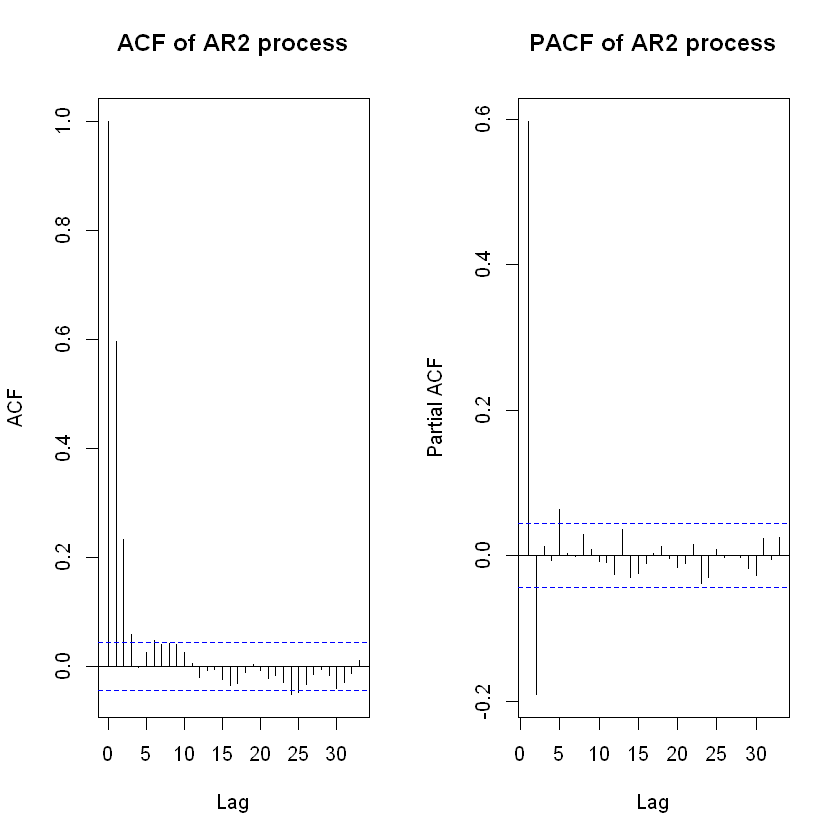

In [2]:
# A simulation example (of AR(2) process)
set.seed(43)
data <- arima.sim(list(order=c(2,0,0),ar=c(.7,-.2)),n=2000)

par(mfrow=c(1,2))
acf(data,main='ACF of AR2 process')
acf(data,type='partial',main='PACF of AR2 process')

#PACF suggests AR process of lag-2
#lets model using ARMA function
m <- arima(data,order = c(2,0,0),include.mean = F)
m #estimated coeffs are pretty close to what we gave

#sigma^2 is nothing but the standard error of the residuals
cat('sigma^2 of the model is',sum(resid(m)^2)/2000)
sigma2 <- sum(resid(m)^2)/2000

#AIC is calculated as log(sigma^2)+(n+2p/n)
AIC <- log(sigma2)+((2000+4)/2000)

cat('AIC of the model is',AIC)

* The problem here is, in general we do not know the order of the given process
* In such cases, how do we asses the Quality of the model ? Using AIC
* For an instance let us pretend that we do not know the order of above process. So let's try to estimate the model for the lags from 1 to 5

In [9]:
m1 <- arima(data,order = c(1,0,0),include.mean = F)
m2 <- arima(data,order = c(2,0,0),include.mean = F)
m3 <- arima(data,order = c(3,0,0),include.mean = F)
m4 <- arima(data,order = c(4,0,0),include.mean = F)
m5 <- arima(data,order = c(5,0,0),include.mean = F)

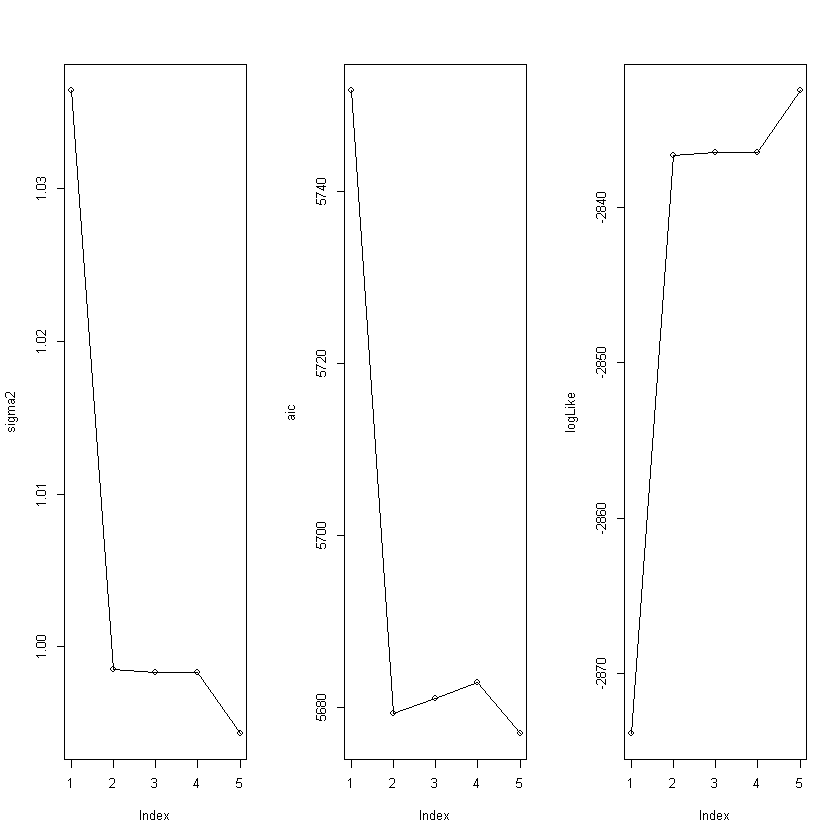

In [18]:
sigma2 <- c(m1$sigma2,m2$sigma2,m3$sigma2,m4$sigma2,m5$sigma2)
aic <- c(m1$aic,m2$aic,m3$aic,m4$aic,m5$aic)
logLike <- c(m1$loglik,m2$loglik,m3$loglik,m4$loglik,m5$loglik)

par(mfrow=c(1,3))
plot(sigma2,type = 'o')
plot(aic,type='o')
plot(logLike,type='o')

### clearly AR(2) model looks parsimonious
* remember the objective of AIC
<img src = "AIC_objective.PNG">

    ie, AIC is a function of two things
        1. Gives credit whenever error reduces (or in other words 'likelihood' increases)
        2. Penalizes for the number of parameters in the model
        
<img src = "AIC_formula.PNG">

### Model evaluation using SSE (Sum of Squarred Error)

    * Model Quality can be evaluated through SSE as well
    
<img src="SSE_evaluation.PNG">